In [1]:
import keras
import numpy as np

In [2]:
from sklearn.metrics import classification_report
import random
import keras
import tensorflow as tf
import tensorflow.keras.models as Sequnetial
import matplotlib.pyplot as plt
import winsound
import cv2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from sklearn.linear_model import LogisticRegression
import os
datadir = "Dataset"
categories = ["Correct sequence", "Incorrect sequence"]
image_size=100;

In [3]:
training_data = []

def create_training_data():
    for category in categories: 
        path = os.path.join(datadir,category)  
        class_num=categories.index(category)
        for img in os.listdir(path): 
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
                new_array=cv2.resize(img_array,(image_size, image_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()

In [4]:
print(len(training_data))

10928


In [6]:
X_train=[]
Y_train=[]
X_test=[]
Y_test=[]

In [24]:
plt.imshow(X_train[47,:])
print(Y_train[47])

TypeError: list indices must be integers or slices, not tuple

In [7]:
for features,label in training_data:
    X_train.append(features)
    Y_train.append(label)

X_train=np.array(X_train).reshape(-1, image_size, image_size,1)

In [8]:
X_train=X_train/255.0

In [9]:
X_train.shape

(10928, 100, 100, 1)

0


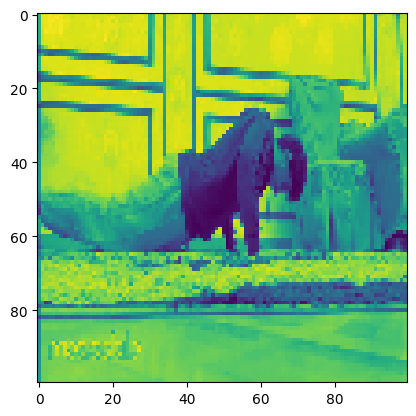

In [12]:
i = random.randint(0,len(X_train))
plt.imshow(X_train[6000,:])
print(Y_train[38])

In [ ]:
    model = keras.models.Sequential()
    model.add(Conv2D(32, (3,3), activation= 'relu', input_shape = (100,100,1)))
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(71, (3, 3), strides=(2,2), padding="same", dilation_rate=(1,1), activation='relu')),

    model.add(Conv2D(32, (3,3), activation= 'relu'))
    model.add(MaxPooling2D((2,2)))

    model.add(Flatten())
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))


C:\Users\Poonam\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [55]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 25, 25, 71)          │          20,519 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 23, 23, 32)          │          20,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3872)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         247,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 289,256 (1.10 MB)

 Trainable params: 289,256 (1.10 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics= ["accuracy"])

In [62]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [63]:
history=model.fit(X_train ,Y_train ,validation_split=0.1, epochs =1, batch_size = 256)

39/39 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9939 - loss: 0.0297 - val_accuracy: 0.8884 - val_loss: 0.4687


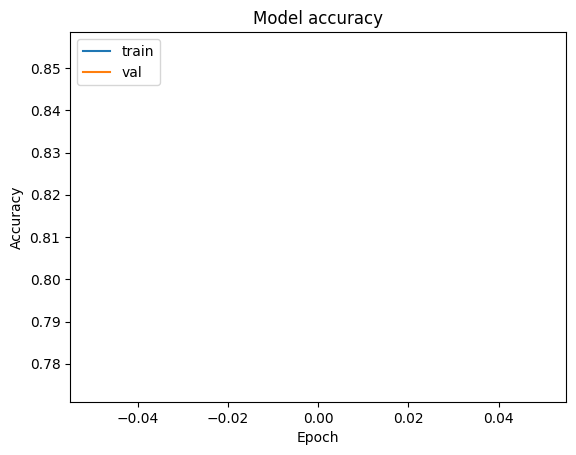

In [59]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

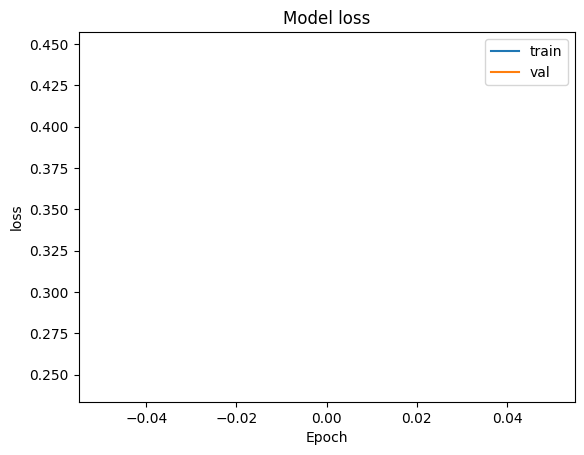

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model loss")
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [14]:
model=tf.keras.models.load_model('Brain1.keras')

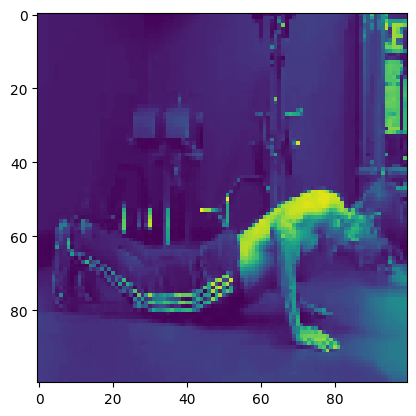

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Our Prediction is : Wrong


In [18]:
i=0
for i in range (1):
    i2=random.randint(0,len(Y_train))
    plt.imshow(X_train[8000,:])
    plt.show()
    Y_pred = model.predict(X_train[8000,:].reshape(-1,100,100,1))
    Y_pred = Y_pred>0.5
    if (Y_pred==0):
        pred = 'Correct'
    else:
        pred = 'Wrong'
    print("Our Prediction is :", pred)
    i=i+1